# LBF5x5-n2-f3-static-v2 posggym-agents policy analysis

In [2]:
import os.path as osp
from typing import List, Any, Optional, Tuple, Callable
from itertools import permutations, product

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from posggym_agents.exp import plot_utils
from posggym_agents.config import BASE_DIR

results_dir = osp.join(BASE_DIR, "agents", "lbf5x5_n2_f3_static_v2", "results")

# Data Loading

In [3]:
heuristic_results_file = osp.join(results_dir, "heuristic_pairwise_results.csv")
heuristic_df = plot_utils.import_results(heuristic_results_file)
heuristic_df.columns

Index(['Unnamed: 0', 'exp_id', 'agent_id', 'env_name', 'policy_id', 'exp_seed',
       'num_episodes', 'time_limit', 'episode_returns_mean',
       'episode_returns_std', 'episode_returns_max', 'episode_returns_min',
       'episode_steps_mean', 'episode_steps_std', 'episode_times_mean',
       'episode_times_std', 'episode_dones', 'num_outcome_LOSS',
       'num_outcome_DRAW', 'num_outcome_WIN', 'num_outcome_NA',
       'episode_returns_CI', 'episode_steps_CI', 'episode_times_CI',
       'prop_LOSS', 'prop_DRAW', 'prop_WIN', 'prop_NA'],
      dtype='object')

## The policies

In [4]:
policy_ids = heuristic_df["policy_id"].unique().tolist()
policy_ids.sort()
print(policy_ids)

['LBF5x5-n2-f3-static-v2/heuristic1-v0', 'LBF5x5-n2-f3-static-v2/heuristic2-v0', 'LBF5x5-n2-f3-static-v2/heuristic3-v0', 'LBF5x5-n2-f3-static-v2/heuristic4-v0']


## Some data cleaning

In [5]:
heuristic_df["policy_id"] = heuristic_df["policy_id"].apply(lambda x: x.split("/")[1])
policy_ids = heuristic_df["policy_id"].unique().tolist()
policy_ids.sort()
print(policy_ids)

['heuristic1-v0', 'heuristic2-v0', 'heuristic3-v0', 'heuristic4-v0']


### RL Pairwise Policy Performance

Here we look at the performance for each possible pairing of policies.

For each performance metric we have a grid of (grid)-plots:
    
- Outer-grid: train seed X train seed
- Inner-grid: policy_id X policy_id

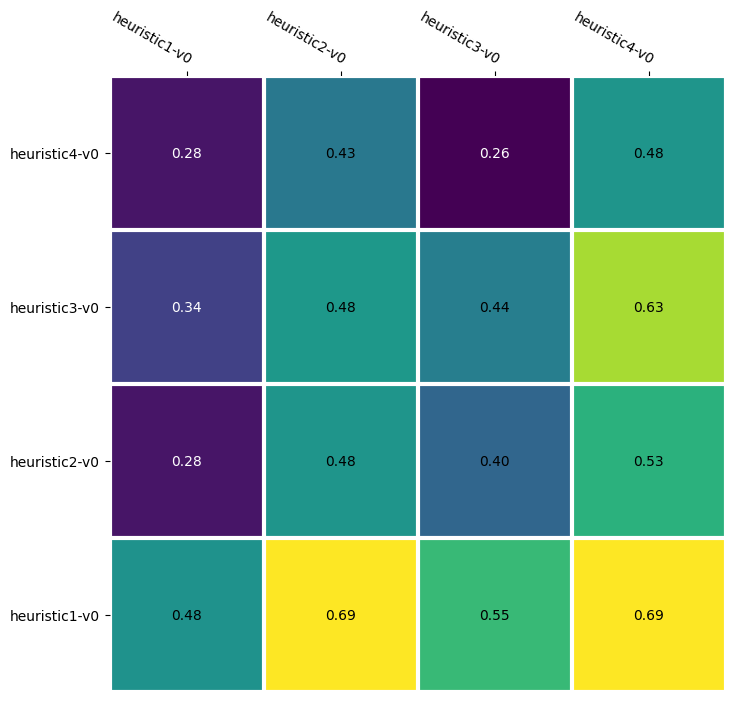

In [6]:
plot_utils.plot_pairwise_comparison(
    heuristic_df, 
    y_key="episode_returns_mean", 
    policy_key="policy_id",
    vrange=None, 
    figsize=(8, 8), 
    valfmt="{x:.2f}",
    average_duplicates=True,
    duplicate_warning=False
)

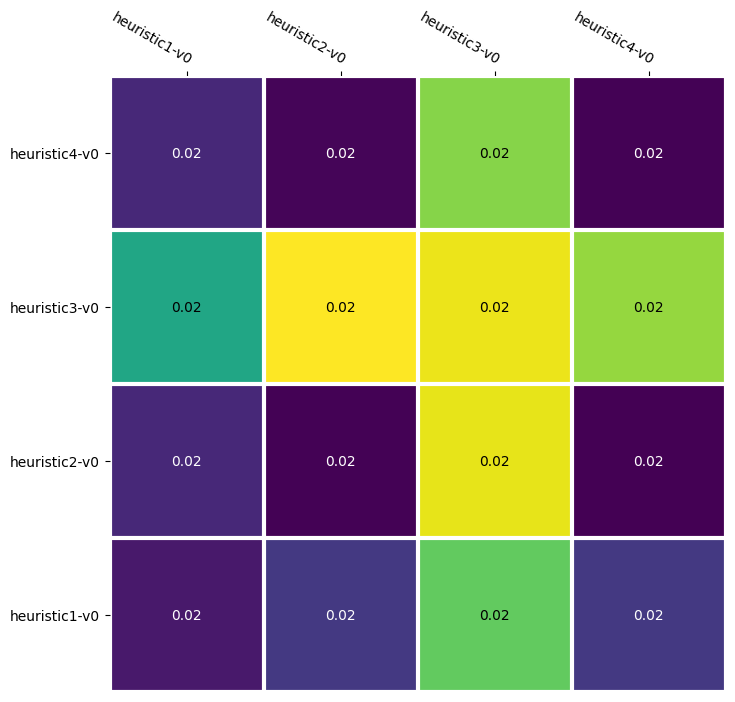

In [6]:
plot_utils.plot_pairwise_comparison(
    heuristic_df, 
    y_key="episode_returns_CI", 
    policy_key="policy_id",
    vrange=None, 
    figsize=(8, 8), 
    valfmt="{x:.2f}",
    average_duplicates=True,
    duplicate_warning=False
)